# Aula 1 - redução de dimensionalidade

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) PCA
- 2) PCA na Pipeline
- 3) PCA na EDA
- 4) A matemática do PCA


In [2]:
from ml_utils import *

____
____
_____

## 1) PCA

PCA (principal component analysis) é uma técnica **não supervisionada** que determina **as direções de máxima variância** no espaço de features, de modo que **as direções sejam ortogonais entre si**.

Ou seja,

> A primeira componente principal é a direção que maximiza a variância dos dados projetados em sua direção; 
<br>A segunda componente principal é uma direção ortogonal à primeira que também maximiza a variância nesta direção;
<br>e assim sucessivamente.

<img src=https://austingwalters.com/wp-content/uploads/2014/11/gaussDist-labeled.png width=400>

Uma forma interessante de ver o PCA é através da construção de um novo espaço de features construído a partir da **projeção** dos dados originais às direções de maior variabilidade.

Considere o conjunto de dados a seguir:

<img src="https://i.stack.imgur.com/jPw90.png">

Podemos nos perguntar: em qual direção podemos **projetar os dados** de modo a capturarmos a **maior variabilidade** dos dados?

Podemos testar várias direções:

<img src="https://i.stack.imgur.com/Q7HIP.gif">

É fácil de ver que existe uma direção em que maximizamos a variabilidade da projeção:

<img src="https://i.stack.imgur.com/lNHqt.gif">

Essa direção é a **primeira componente principal!** 

Recomendo bastante a leitura [deste post](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues), onde o PCA é explicado em diferentes graus de formalismo matemático, de maneira bem divertida!

É importante notar que:

- Se o espaço original tem $n$ features, é possível construir $n$ componentes principais;<br><br>
- Cada componente principal é uma **combinação linear das features originais**;<br><br>
- As componentes principais são ortogonais entre si;<br><br>
- As componentes principais são linearmente descorrelacionadas;<br>

É muito comum que PCA seja utilizada como uma técnica de **redução de dimensionalidade**, isto porque, **no espaço transformado de componentes principais**, é comum que grande parte da variância completa dos dados esteja contida nas $L$ primeiras componentes principais ($L < n$).

Sendo assim, ao invés de utilizar o espaço de features completo (de dimensão $n$) para a construção de modelos, podemos utilizar apenas $L$ dimensões **do espaço de features de componentes principais**, reduzindo, assim, a dimensionalidade do espaço de features efetivo em que os estimadores irão trabalhar.

Os objetivos desta redução podem ser:

- Evitar a maldição da dimensionalidade;
- Treinar modelos mais rápido (de maneira mais eficiente), afinal, há menos dados;
- Fornecer dados sem qualquer colinearidade (há estimadores que assumem não-colinearidade!)

### 1.1) O que é cada PC? 
### PCA como feature map

Como dissemos acima, cada componente principal é uma **combinação linear das features originais**.

Nesse sentido, podemos enxergar o PCA como **um método que constrói um novo espaço de features** (ou seja, um *feature map!*), de mesma dimensão que o espaço original:

<img src=https://miro.medium.com/max/1200/1*V3JWBvxB92Uo116Bpxa3Tw.png width=700>

O ponto é que o espaço de features construído pelo PCA é muito particular: as novas features são ortogonais entre si, e tais que maximizam a variância dos dados em cada sub-espaço de projeção, como dissemos acima.

Assim, na prática, seja um espaço de input $\mathcal{X}$ de $n$ dimensões, tal que cada vetor de features $\vec{x} \in \mathcal{X}$ é dado por:

$ \vec{x} = \left ( x_1, x_2, x_3, \cdots , x_n \right) $

Após a aplicação do PCA, estaremos no espaço de componentes principais, tal que um vetor de features neste espaço, $\vec{x}_{PC}$, será dado por:

$ \vec{x}_{PC} = \left ( PC_1, PC_2, PC_3, \cdots , PC_n \right) $

Onde cada componente principal é uma combinação linear das features originais, isto é, 

$ PC_i = \sum_{k=1}^n \alpha_{i, k} x_k = \alpha_{i, 1} x_1 +  \alpha_{i, 2} x_2 + \cdots +  \alpha_{i, n} x_n$

Note que cada componente principal $i$ tem $n$ coeficientes diferentes $\alpha_{i, k}$, que acompanham cada uma das features $k$ do espaço original.

Para visualizarmos concretamente o PCA em ação, vamos tomar um dataset bem simples!

In [3]:
df = pd.read_csv("../datasets/iris.csv")

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
X = df.drop(columns="species")
y = df["species"]

In [6]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


No caso do dataset iris, temos 4 features, de modo que o espaço original tem 4 dimensões, e um vetor de features é:

$ \vec{x} = (x_1, x_2, x_3, x_4)$.

Sendo que:

- $x_1$ : 'sepal_length', 
- $x_2$ : 'sepal_width', 
- $x_3$ : 'petal_length', 
- $x_4$ : 'petal_width'.

Assim, esperamos que após o PCA, o espaço de componentes principais também tenha 4 dimensões, isto é, 

$ \vec{x}_{PC} = \left ( PC_1, PC_2, PC_3, PC_4 \right) $

E as componentes principais serão: 

$ PC_1 = \alpha_{1, 1} x_1 + \alpha_{1, 2} x_2 + \alpha_{1, 3} x_3 + \alpha_{1, 4} x_4$

$ PC_2 = \alpha_{2, 1} x_1 + \alpha_{2, 2} x_2 + \alpha_{2, 3} x_3 + \alpha_{2, 4} x_4$

$ PC_3 = \alpha_{3, 1} x_1 + \alpha_{3, 2} x_2 + \alpha_{3, 3} x_3 + \alpha_{3, 4} x_4$

$ PC_4 = \alpha_{4, 1} x_1 + \alpha_{4, 2} x_2 + \alpha_{4, 3} x_3 + \alpha_{4, 4} x_4$

Vamos agora aplicar o PCA para calcular as componentes principais!

Mas antes, um ponto muito importante: **devemos escalar as features originais com o StandardScaler antes de aplicarmos o PCA**!

Isso porque o método matemático recebe dados com média 0 e desvio padrão 1!

In [12]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.6,1.4,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [14]:
std_scaler = StandardScaler().fit(X_train)

X_train_ss = pd.DataFrame(std_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

In [15]:
X_train_ss.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-1.554312e-16,1.006371e-15,3.885781e-17,1.739349e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.840983e+00,-2.347097e+00,-1.516067e+00,-1.454945e+00
25%,-8.856620e-01,-5.559895e-01,-1.232159e+00,-1.191606e+00
50%,-1.094638e-01,-1.082127e-01,2.725514e-01,1.250858e-01
75%,6.667343e-01,6.194245e-01,7.551944e-01,7.834318e-01
max,2.457961e+00,3.026225e+00,1.777262e+00,1.705116e+00


Agora sim!

A classe é essa: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42).fit(X_train_ss)

In [17]:
pca

PCA(random_state=42)

Com o PCA fitado, temos alguns atributos importantes!

In [19]:
pca.feature_names_in_

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

O atributo `components_` dá exatamente os coeficientes $\alpha_{i, k}$ que determinan as combinações lineares de cada componente principal!

In [20]:
pca.components_

array([[ 0.52679335, -0.25307206,  0.58186918,  0.56557189],
       [ 0.34813945,  0.93470791,  0.02689438,  0.06630793],
       [-0.72745724,  0.22196252,  0.1386138 ,  0.6342908 ],
       [ 0.26850263, -0.11405393, -0.80093144,  0.52288323]])

In [22]:
X_train_ss

,sepal_length,sepal_width,petal_length,petal_width
8,-1.721568,-0.332101,-1.345722,-1.323276
106,-1.124492,-1.227655,0.414505,0.651763
76,1.144395,-0.555990,0.584850,0.256755
9,-1.124492,0.115676,-1.288941,-1.454945
89,-0.408002,-1.227655,0.130598,0.125086
...,...,...,...,...
37,-1.124492,1.235118,-1.345722,-1.454945
2,-1.363322,0.339564,-1.402504,-1.323276
33,-0.408002,2.578448,-1.345722,-1.323276
52,1.263810,0.115676,0.641631,0.388424


In [24]:
[f"PC{i+1}" for i in range(4)]

['PC1', 'PC2', 'PC3', 'PC4']

In [29]:
pca.n_components_

4

In [30]:
X_train_pca = pd.DataFrame(pca.transform(X_train_ss), index=X_train.index, 
                           columns=[f"PC{i+1}" for i in range(pca.n_components_)])

X_train_pca

,PC1,PC2,PC3,PC4
8,-2.354307,-1.033699,0.152776,-0.038455
106,0.328116,-1.484614,1.016390,-0.153105
76,1.229084,-0.088525,-0.711982,0.036514
9,-2.194520,-0.414497,-0.257827,-0.043535
89,0.242488,-1.277733,0.121754,-0.008725
...,...,...,...,...
37,-2.510859,0.630327,-0.017224,-0.125734
2,-2.368605,-0.282696,0.033381,0.026607
33,-2.398907,2.144118,-0.156755,-0.017719
52,1.229520,0.591117,-0.558379,0.015341


Ou seja,

$PC_1 = 0.527x_1 -0.253x_2 + 0.582x_3 + 0.566x_4$

$PC_2 = 0.348x_1 + 0.935x_2 + 0.027x_3 + 0.066x_4$

$PC_3 = -0.727x_1 + 0.222x_2 + 0.139x_3 + 0.634x_4$

$PC_4 = 0.269x_1 -0.114x_2 -0.801x_3 + 0.523x_4$

Lembrando que:

- $x_1$ : 'sepal_length', 
- $x_2$ : 'sepal_width', 
- $x_3$ : 'petal_length', 
- $x_4$ : 'petal_width'.

Há alguns outros atributos muito importantes:

O `.explained_variance_` dá a **porção de variância** explicada por cada componente principal!

In [35]:
X_train_ss.var()

sepal_length    1.008403
sepal_width     1.008403
petal_length    1.008403
petal_width     1.008403
dtype: float64

In [34]:
X_train_ss.var().sum()

4.033613445378153

In [31]:
pca.explained_variance_

array([2.93151868, 0.93042018, 0.15254729, 0.01912729])

O `.explained_variance_ratio_`dá a **proporção** de variância explicada por cada PC:

In [37]:
pca.explained_variance_ratio_*100

array([72.67723405, 23.06666702,  3.78190145,  0.47419749])

In [40]:
pca.explained_variance_ratio_.cumsum()*100

array([ 72.67723405,  95.74390107,  99.52580251, 100.        ])

Podemos plotar os resultados acima:

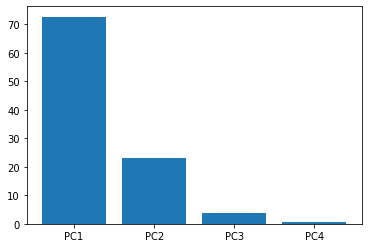

In [42]:
plt.bar([f"PC{i+1}" for i in range(pca.n_components_)], pca.explained_variance_ratio_*100);

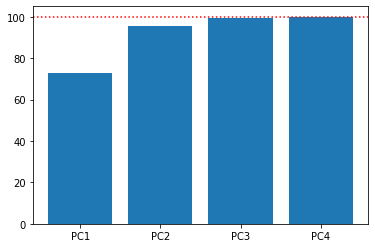

In [46]:
plt.bar([f"PC{i+1}" for i in range(pca.n_components_)], pca.explained_variance_ratio_.cumsum()*100)
plt.axhline(y=100, color="red", ls=":");

Dos resultados, é fácil ver que com apenas 2 componentes principais, capturamos 95% da variância dos dados!

Assim, caso queiramos reduzir o número de dimensões de $n=4$ para $L=2$, temos a garantia de que grande parte da variabilidade estará contida nas duas componentes principais que usaremos para modelagem!

> Veja que a escolha de $L < n$ componentes principais pode ser vista como um procedimento de **feature selection**, mas feito **no espaço de componentes principais!**
> Como não são as features originais que são selecionadas, é comum nos referirmos a este procedimento como **redução de dimensionalidade** (e a dimensionalidade que é reduzida é do espaço de componentes principais!)

De fato, note que **todas as 4 features originais** estão presentes em cada uma das PCs, como termos da combinação linear que define cada PC. E, naturalmente, todas as 4 estão presentes nas $L$ primeiras.

Caso queiramos construir modelos no espaço de componentes principais, é importante que incorporemos o PCA em nossa pipeline! 

Vamos ver na prática!

____________

## 2) PCA na Pipeline

In [47]:
df = pd.read_csv("../datasets/iris.csv")

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
from sklearn.linear_model import LogisticRegression

Métricas de avaliação de treino


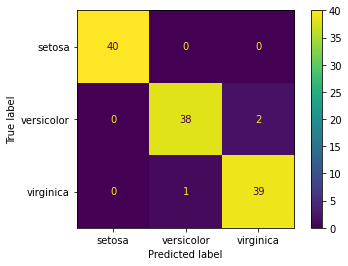


################################################################################

Métricas de avaliação de teste


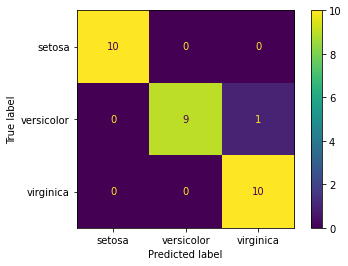

In [54]:
pipe_sem_pca = Pipeline([("lr", LogisticRegression(random_state=42))]).fit(X_train, y_train)

_ = clf_metrics_train_test(pipe_sem_pca, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=False)

Métricas de avaliação de treino


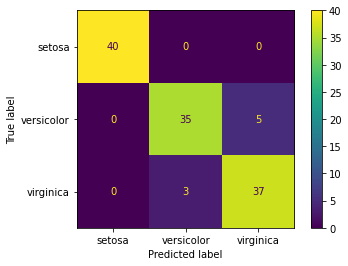


################################################################################

Métricas de avaliação de teste


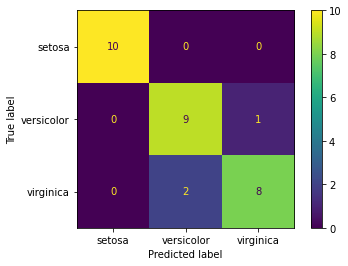

In [55]:
pipe_sem_pca = Pipeline([("ss", StandardScaler()), 
                         # aqui eu to escolhendo o numero de PCs que quero!
                         ("pca", PCA(n_components=2)),
                         ("lr", LogisticRegression(random_state=42))]).fit(X_train, y_train)

_ = clf_metrics_train_test(pipe_sem_pca, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=False)

Ao invés de escolher explicitamente o número de PCs a serem utilizadas, podemos também declarar a porcentagem acumulada mínima de variância que queremos capturar nas $L$ PCs selecionadas:

Métricas de avaliação de treino


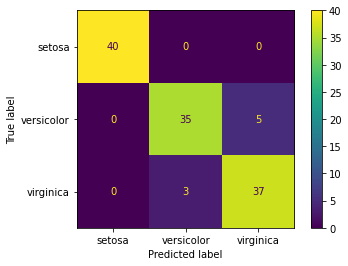


################################################################################

Métricas de avaliação de teste


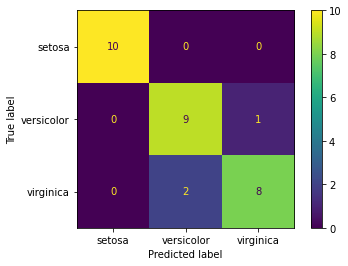

In [56]:
pipe_com_pca = Pipeline([("ss", StandardScaler()), 
                         # aqui eu to escolhendo INDIRETAMENTE o numero de PCs que quero!
                         ("pca", PCA(n_components=0.9)),
                         ("lr", LogisticRegression(random_state=42))]).fit(X_train, y_train)

_ = clf_metrics_train_test(pipe_com_pca, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=False)

In [59]:
pipe_sem_pca["pca"]

PCA(n_components=0.9)

In [60]:
pipe_sem_pca["pca"].n_components_

2

___________

Vamos analisar um outro dataset?

In [61]:
df_bc = pd.read_csv("../datasets/breast_cancer.csv")

X = df_bc.drop(columns=["id", "diagnosis"])
y = df_bc["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [62]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


Antes, vamos analisar o PCA

In [63]:
pipe_pca = Pipeline([("ss", StandardScaler()), ("pca", PCA())]).fit(X_train)

In [64]:
pipe_pca

Pipeline(steps=[('ss', StandardScaler()), ('pca', PCA())])

In [66]:
pca_bc = pipe_pca["pca"]

pca_bc

PCA()

In [68]:
pd.DataFrame(pca_bc.components_)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.217057,0.101900,0.225804,0.219079,0.148588,0.241928,0.257761,0.260383,0.142086,0.071593,...,0.226607,0.104176,0.235494,0.223108,0.129968,0.210301,0.226322,0.249367,0.122964,0.133513
1,-0.239776,-0.061533,-0.220949,-0.236925,0.177063,0.139921,0.060089,-0.040533,0.193612,0.366648,...,-0.223083,-0.047070,-0.202365,-0.223734,0.168982,0.142217,0.104547,-0.006525,0.150772,0.277471
2,-0.008311,0.042622,-0.008682,0.026774,-0.123747,-0.072390,0.006244,-0.033120,-0.031526,-0.024754,...,-0.051765,-0.065006,-0.051920,-0.018463,-0.273405,-0.232023,-0.166840,-0.173776,-0.258227,-0.227019
3,0.034019,-0.604567,0.034811,0.049760,0.172319,0.026919,0.018772,0.066597,0.060259,0.047728,...,0.014340,-0.625307,0.011821,0.028554,0.046106,-0.086943,-0.070720,0.012278,-0.023137,-0.076337
4,0.051273,-0.078389,0.049230,0.019268,-0.353763,0.005880,0.088314,-0.037016,-0.289883,-0.057985,...,0.005302,-0.120841,0.015576,-0.020667,-0.321436,0.121794,0.201613,0.050592,-0.227207,0.093793
5,0.022095,-0.033330,0.021464,-0.005856,-0.271336,-0.009350,-0.011982,-0.030996,0.353414,-0.124979,...,0.003814,-0.051660,0.013744,-0.028860,-0.341606,0.039656,0.019544,-0.007397,0.512424,-0.092844
6,0.131639,0.019324,0.120195,0.063394,0.115507,-0.042769,0.080651,0.138948,0.088844,-0.294945,...,0.028552,0.005553,0.014088,-0.045483,0.133500,-0.159190,0.021131,0.165254,0.033966,-0.358977
7,0.046098,-0.201142,0.055599,0.000958,0.285402,0.157806,0.100744,0.183449,0.152937,0.171085,...,-0.015466,-0.059133,-0.006079,-0.057568,-0.151450,-0.095943,-0.058419,0.054487,-0.220652,-0.082971
8,-0.174011,0.127048,-0.179169,-0.158599,0.062931,-0.174615,0.011674,-0.073631,0.415290,-0.085417,...,-0.076653,0.114440,-0.086241,-0.046408,0.050372,-0.186198,0.060580,0.051455,0.037473,-0.149476
9,-0.133805,-0.106163,-0.124421,-0.118962,0.117840,-0.029058,0.144988,-0.022300,-0.521364,-0.116367,...,-0.115174,0.023287,-0.087952,-0.117130,0.162910,0.113328,0.345412,0.100787,0.026673,-0.121790


In [71]:
pca_bc.explained_variance_

array([1.34075237e+01, 5.57583121e+00, 2.88172583e+00, 1.98248759e+00,
       1.69040102e+00, 1.19918188e+00, 6.65811271e-01, 4.85268216e-01,
       3.86285667e-01, 3.50468676e-01, 3.03174298e-01, 2.72258795e-01,
       2.38314353e-01, 1.44161469e-01, 9.14330565e-02, 7.55558771e-02,
       5.93879845e-02, 5.24392723e-02, 4.73079416e-02, 3.16151650e-02,
       2.99319648e-02, 2.39270335e-02, 2.35728449e-02, 1.59724926e-02,
       1.53896919e-02, 7.94084410e-03, 6.31364827e-03, 1.51324664e-03,
       7.60153510e-04, 1.24064291e-04])

In [75]:
np.set_printoptions(suppress=True)

pca_bc.explained_variance_ratio_*100

array([44.5935222 , 18.54525545,  9.58464121,  6.59376825,  5.62228616,
        3.98848772,  2.21449317,  1.61400564,  1.28478896,  1.16566138,
        1.00835994,  0.90553475,  0.79263529,  0.4794821 ,  0.30410702,
        0.2512994 ,  0.19752487,  0.1744134 ,  0.15734656,  0.10515227,
        0.09955393,  0.07958149,  0.07840345,  0.05312463,  0.05118623,
        0.02641131,  0.02099924,  0.00503307,  0.00252828,  0.00041264])

In [76]:
pca_bc.explained_variance_ratio_.cumsum()*100

array([ 44.5935222 ,  63.13877766,  72.72341886,  79.31718711,
        84.93947327,  88.927961  ,  91.14245416,  92.7564598 ,
        94.04124876,  95.20691014,  96.21527008,  97.12080483,
        97.91344011,  98.39292221,  98.69702923,  98.94832863,
        99.1458535 ,  99.32026691,  99.47761347,  99.58276574,
        99.68231967,  99.76190116,  99.84030461,  99.89342924,
        99.94461547,  99.97102678,  99.99202602,  99.99705909,
        99.99958736, 100.        ])

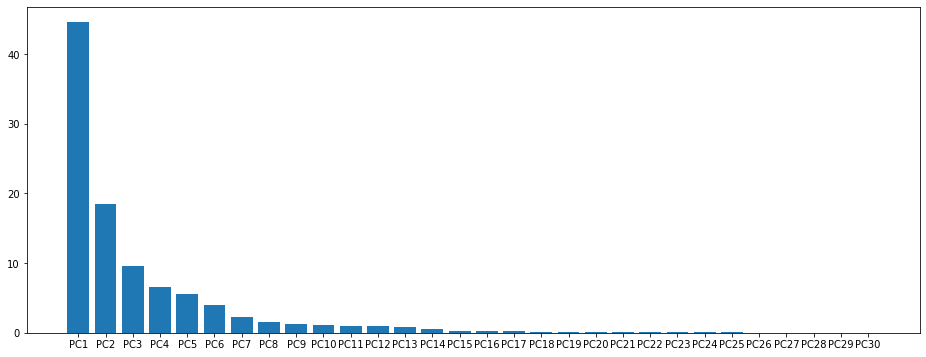

In [79]:
plt.figure(figsize=(16, 6))

plt.bar([f"PC{i+1}" for i in range(pca_bc.n_components_)], pca_bc.explained_variance_ratio_*100);

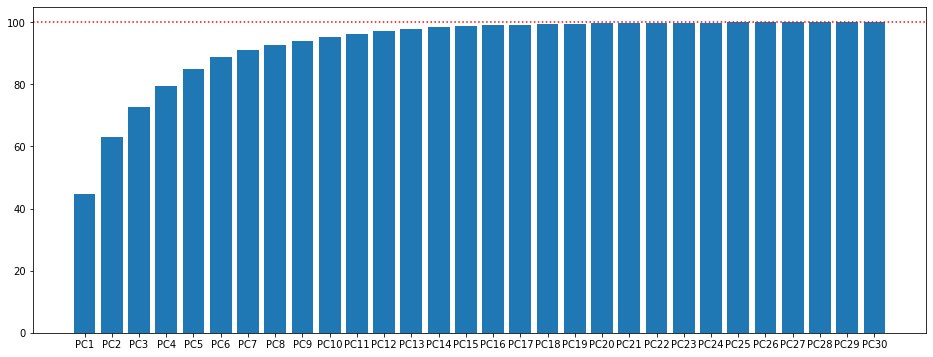

In [78]:
plt.figure(figsize=(16, 6))

plt.bar([f"PC{i+1}" for i in range(pca_bc.n_components_)], pca_bc.explained_variance_ratio_.cumsum()*100)
plt.axhline(y=100, color="red", ls=":");

Vamos treinar modelos!

Métricas de avaliação de treino - com cutoff = 0.50


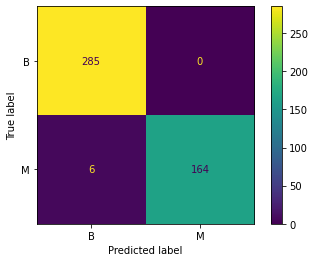

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       1.00      0.96      0.98       170

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


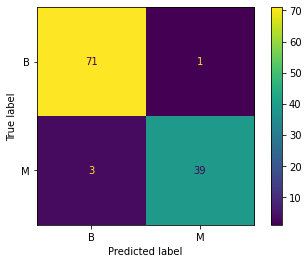

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [82]:
pipe_sem_pca = Pipeline([("ss", StandardScaler()), 
                         ("lr", LogisticRegression(random_state=42))]).fit(X_train, y_train)

_ = clf_metrics_train_test(pipe_sem_pca, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label="M")

In [83]:
4/30

0.13333333333333333

In [87]:
26/30

0.8666666666666667

Métricas de avaliação de treino - com cutoff = 0.50


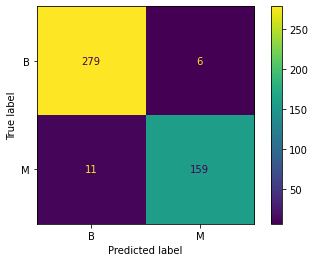

              precision    recall  f1-score   support

           B       0.96      0.98      0.97       285
           M       0.96      0.94      0.95       170

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455


################################################################################

Métricas de avaliação de teste - com cutoff = 0.50


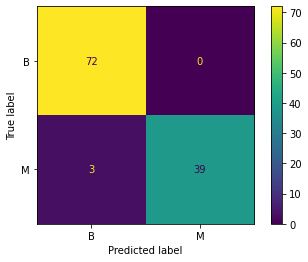

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [88]:
pipe_com_pca = Pipeline([("ss", StandardScaler()), 
                         # aqui eu to escolhendo INDIRETAMENTE o numero de PCs que quero!
                         ("pca", PCA(n_components=4)),
                         ("lr", LogisticRegression(random_state=42))]).fit(X_train, y_train)

_ = clf_metrics_train_test(pipe_com_pca, X_train, y_train, X_test, y_test, cutoff=0.5, 
                           plot_conf_matrix=True, print_cr=True, pos_label="M")

Mesmo usando apenas duas features (PCs), temos uma performance comparável à do modelo treinado no espaço de input completo!

Este é o grande poder do PCA!

____________

## 3) PCA na EDA

Um outro uso importante do PCA é como um auxiliar na **interpretabilidade** de dados de alta dimensionalidade.

Ao fazermos uma redução de dimensionalidade, podemos passar a enxergar os dados em duas dimensões (por exemplo), o que pode nos ajudar a extrair insights mais precisos, sendo uma importante ferramenta para complementar as técnicas de EDA que já conhecemos.

Fazer isso na prática é muito simples!

### EDA com PCA - breast cancer

In [119]:
df_bc = pd.read_csv("../datasets/breast_cancer.csv")

X = df_bc.drop(columns=["id", "diagnosis"])
y = df_bc["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

In [102]:
# isso aqui, nao rola...
# sns.pairplot(pd.concat([X_train, y_train], axis=1), hue="diagnosis");

In [93]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [95]:
pipe_pca = Pipeline([("ss", StandardScaler()), ("pca", PCA(n_components=2))]).fit(X_train)

X_train_pca = pd.DataFrame(pipe_pca.transform(X_train), index=X_train.index, 
                           columns=[f"PC{i+1}" for i in range(pipe_pca["pca"].n_components_)])

X_train_pca

,PC1,PC2
10,-0.875937,-2.571309
170,-2.505128,0.192453
407,-1.354117,0.417851
430,4.854091,3.017576
27,2.926225,-1.866546
...,...,...
37,-3.730069,-1.364877
415,-1.894651,0.942551
458,-3.180442,-1.992055
476,-0.568062,-0.906734


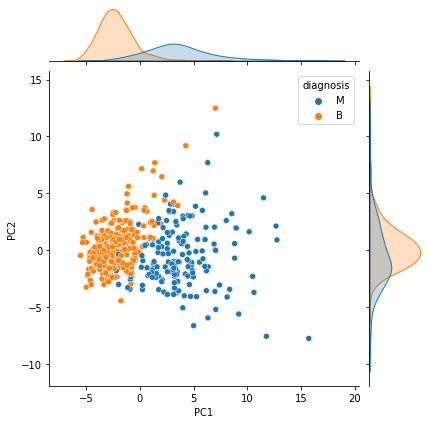

In [100]:
X_pca_com_y_train = pd.concat([X_train_pca, y_train], axis=1)

sns.jointplot(data=X_pca_com_y_train, x="PC1", y="PC2", hue="diagnosis");

Dá pra fazer também um gráfico 3D:

In [103]:
pipe_pca = Pipeline([("ss", StandardScaler()), ("pca", PCA(n_components=3))]).fit(X_train)

X_train_pca = pd.DataFrame(pipe_pca.transform(X_train), index=X_train.index, 
                           columns=[f"PC{i+1}" for i in range(pipe_pca["pca"].n_components_)])

X_train_pca

,PC1,PC2,PC3
10,-0.875937,-2.571309,-0.548511
170,-2.505128,0.192453,-0.404965
407,-1.354117,0.417851,2.545009
430,4.854091,3.017576,-1.626587
27,2.926225,-1.866546,2.486468
...,...,...,...
37,-3.730069,-1.364877,1.713709
415,-1.894651,0.942551,0.074451
458,-3.180442,-1.992055,0.009280
476,-0.568062,-0.906734,-0.314257


In [104]:
y_train.unique()

array(['M', 'B'], dtype=object)

In [109]:
X_pca_y.query(f"diagnosis == 'M'")

,PC1,PC2,PC3,diagnosis
10,-0.875937,-2.571309,-0.548511,M
430,4.854091,3.017576,-1.626587,M
27,2.926225,-1.866546,2.486468,M
212,11.759700,-7.573812,9.565187,M
36,1.240639,0.963397,-1.515270,M
...,...,...,...,...
446,3.111006,-1.733402,-1.881087,M
392,4.029249,0.776450,-0.931314,M
230,3.148289,-0.089327,-2.877062,M
229,2.718681,3.483697,-2.399294,M


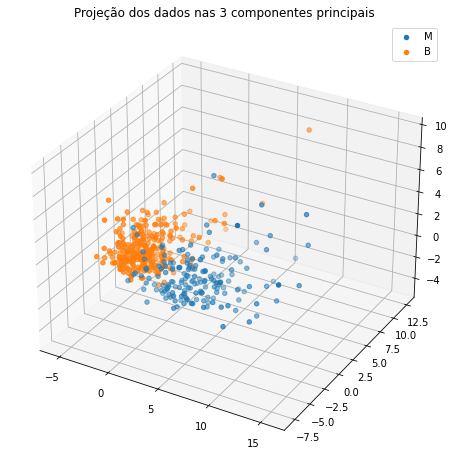

In [107]:
X_pca_y = pd.concat([X_train_pca, y_train], axis=1)

# ==========================

fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Projeção dos dados nas 3 componentes principais")

for level in y_train.unique():
    
    X_level = X_pca_y.query(f"diagnosis == '{level}'")
    
    ax.scatter(X_level["PC1"], X_level["PC2"], X_level["PC3"], label=level)
    
ax.legend()
plt.show()

Vamos fazer uma função para isso:

In [110]:
y_train.name

'diagnosis'

In [116]:
def pca_eda(X, y, n_components):
    '''
    n_components: 2 ou 3
    '''
    
    pipe_pca = Pipeline([("ss", StandardScaler()),
                         ("pca", PCA(n_components=n_components))]).fit(X)

    X_pca = pd.DataFrame(pipe_pca.transform(X), index = X.index,
                         columns=[f"PC{i+1}" for i in range(n_components)])
    
    X_pca_y = pd.concat([X_pca, y], axis=1)
    
    target_name = y.name
    
    # =======================================

    if n_components == 2:
        
        g = sns.jointplot(data=X_pca_y, x="PC1", y="PC2", hue=target_name)
        
        g.fig.suptitle(f"Projeção dos dados nas 2 componentes principais", y=1.08)

        plt.show()
        
    elif n_components == 3:
        
        fig = plt.figure(figsize=(8, 8))

        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(f"Projeção dos dados nas 3 componentes principais")

        for level in y_train.unique():

            X_level = X_pca_y.query(f"{target_name} == '{level}'")

            ax.scatter(X_level["PC1"], X_level["PC2"], X_level["PC3"], label=level)

        ax.legend()
        plt.show()
        
    else:
        
        print("Não é possível visualizar em mais de 3 dimensões!")

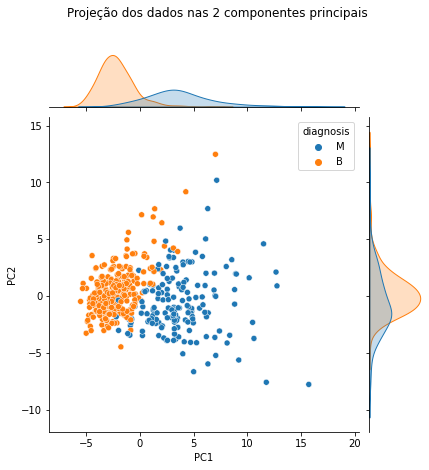

In [120]:
pca_eda(X_train, y_train, n_components=2)

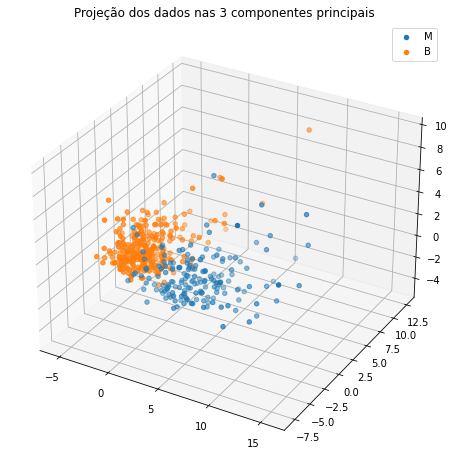

In [121]:
pca_eda(X_train, y_train, n_components=3)

Vamos fazer o mesmo pro dataset iris!

### EDA com PCA - iris

In [122]:
df = pd.read_csv("../datasets/iris.csv")

X = df.drop(columns="species")
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify=y)

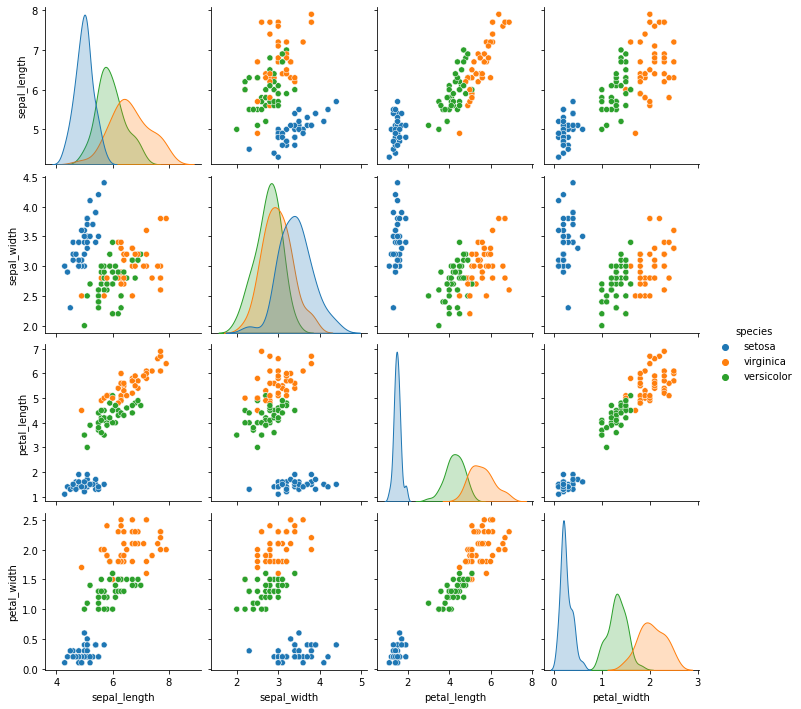

In [91]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue="species");

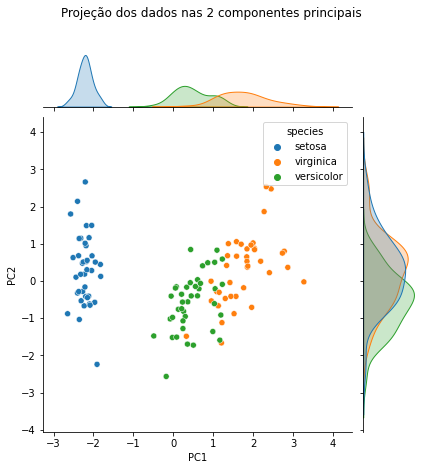

In [123]:
pca_eda(X_train, y_train, n_components=2)

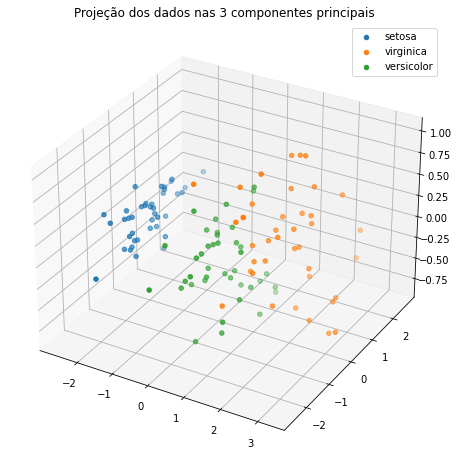

In [124]:
pca_eda(X_train, y_train, n_components=3)

____________

## 4) A matemática do PCA

__________

Considere a matriz de features $X_{N \times n}$

> $N$ linhas (observações), cada uma caracterizada por $n$ features no espaço original.

Cada observação $i$ é caracterizada pelo vetor de features $\vec{x}_i = (x_{i1}, x_{i2}, \cdots, x_{in}$), que são as linhas da matriz de features:

$$
  X = \left [ \begin{array}{ccccc}
x_{11} & x_{12} & x_{13} & \cdots & x_{1n}\\ 
x_{21} & x_{22} & x_{23} & \cdots & x_{2n}\\ 
\vdots & \vdots & \vdots & \cdots & \vdots  \\
x_{N1} & x_{N2} & x_{N3} & \cdots & x_{Nn}\\ 
   \end{array} \right ] 
$$

____________

### Passo 1 - standardização

Para dados em que as features originais $x_j$ estão em escalas diferentes, é necessário escalar os dados para que eles tenham média 0 e desvio padrão 1 (ou seja, usamos o `StandardScaler`). 

Isso porque os componentes são influenciados pela escala das variáveis, justamente porque as matrizes de covariâncias, $\Sigma$ ou $\hat{\Sigma} = S$, são sensíveis à escala de um par de variáveis. 

Considere:

- $\bar{x}_j$ a média da variável $x_j$; 
- $s(x_j)$ o desvio padrão de $x_j$; 

Sendo $i = 1, 2,3,4,\cdots, N$ e $j = 1, 2,3,4,\cdots, n$.

Com isso, a padronização pode ser realizada por meio da equação abaixo: 

- Média 0 e desvio padrão 1: 

$$ \tilde{x}_{ij}= \frac{x_{ij}-\bar{x_j}}{s(X_j)} $$ 

<br>

### Passo 2 - cálculo da matriz de covariância

Calcular a matriz de **covariância**/**correlação**, que são dadas por:

$$
  S = \left [ \begin{array}{ccccc}
\hat{Var}(x_1) & \hat{Cov}(x_1x_2) & \hat{Cov}(x_1x_3) & \cdots & \hat{Cov}(x_1x_n)\\ 
\hat{Cov}(x_2x_1) &\hat{Var}(x_2)& \hat{Cov}(x_2x_3) & \cdots & \hat{Cov}(x_2x_n)\\ 
\vdots & \vdots & \vdots & \cdots & \vdots  \\
\hat{Cov}(x_nx_1) & \hat{Cov}(x_nx_2)  & \hat{Cov}(x_nx_3)  & \cdots & \hat{Var}(x_n)\\ 
   \end{array} \right ] 
$$

<br>
<br>

$$
  R = \left [ \begin{array}{ccccc}
1 & r(x_1x_2) & r(x_1x_3) & \cdots & r(x_1x_n)\\ 
r(x_2x_1) & 1 & r(x_2x_3) & \cdots & r(x_2x_n)\\ 
\vdots & \vdots & \vdots & \cdots & \vdots  \\
r(x_nx_1) & r(x_nx_2)  & r(x_nx_3)  & \cdots & 1\\ 
   \end{array} \right ] 
$$

Em que:

$$
 \begin{array}{ccc}
\hat{Var}(x_j) = \frac{\sum_{i=1}^{N}(x_{ij}-\bar{x}_j)^2}{N-1}, & 
\hat{Cov}(x_{j1},x_{j2}) = \frac{\sum_{i=1}^N(x_{ij1}-\bar{x_{j1}})(x_{ij2}-\bar{x_{j2}})}{N-1}, &
r(x_{j1},x_{j2}) = \frac{\hat{Cov}(x_{j1},x_{j2})}{S_{xj1}S_{xj2}}
   \end{array} 
$$

<br>

### Passo 3 - determinação de autovalores e autovetores

As componentes principais são determinadas através da equação característica (equação de autovalores) da matriz S ou R:

$$det[R - \lambda I]= 0 $$

Em que $I$ é a matriz identidade de dimensão $n \times n $. 

Se R ou S tem posto completo igual a $n$, então $det[R - \lambda I]= 0$, que pode ser reescrito como $\mid R - \lambda I \mid = 0$, terá $n$ soluções. Lembrando que ter posto completo significa que nenhuma coluna é combinação linear de outra.

Considere que $\lambda_1,\lambda_2,\lambda_3, \cdots, \lambda_n$ sejam as raízes da equação característica de R ou S, então temos que  $\lambda_1 > \lambda_2 > \lambda_3 > \cdots, \lambda_n$. 

Chamamos $\lambda_i$ de **autovalores**. 

Além disso, para cada autovalor há um **autovetor** $\tilde{a}_i$ associado, $
  \tilde{a}_i = \left [ \begin{array}{c}
a_{i1}\\ 
a_{i2}\\ 
\vdots \\
a_{ip} \\ 
   \end{array} \right ] 
$

O cálculo do autovetor $\tilde{a}_i$, pode ser realizado considerando a seguinte propriedade:

$$ R\tilde{a}_i =  \lambda_i \tilde{a}_i $$

O autovetor deve ser normalizado, isso é,

$$ a_i = \frac{\tilde{a}_i }{\mid \tilde{a}_i  \mid}$$

Desta maneira, as componentes do vetor são tais que sua norma L2 é igual a 1.

<br>

### Passo 4 - cálculo das componentes principais

O cálculo da i-ésima componente principal é dado por:

$$PC_i = a_{i1}x_1 + a_{i2}x_2 + a_{i3}x_3 + \cdots + a_{in}x_n $$

em que $a_{i1}$ são as componetes do autovetor $a_i$ associado ao autovalor $\lambda_i$.

__________

Operacionalmente, o PCA se apoia em um procedimento matemático denominado **Singular Value Decomposition (SVD)**, que é uma forma de decompor qualquer matriz não quadrada $M_{m\times n}$,

$$M_{m\times n} = U_{m \times m}\Sigma_{m \times n}V_{n \times n}^{\dagger}$$

- onde $U$ é uma matriz unitária $m\times m$ real ou complexa;

- $\Sigma$ é uma matriz retangular diagonal $m\times n$ com números reais não-negativos na diagonal;

- e $V^{\dagger}$ (a conjugada transposta de $V$) é uma matriz unitária $n\times n$ real ou complexa. 

Os valores de $\Sigma$ são os chamados valores singulares de $M$. As $m$ colunas de $U$ e as $n$ colunas de $V$ são os chamados vetores singulares à esquerda e vetores singulares à direita de $A$, respetivamente.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/800px-Singular_value_decomposition_visualisation.svg.png width=300>